In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uncertainties
from uncertainties import unumpy
import os

In [2]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [3]:
calib_df = pd.read_csv("../../data/1550/calib/calib_df.csv")
calib_df.head()

,voltage_xx,mean_force_xx,std_force_xx,calib_curve_xx,voltage_xy,mean_force_xy,std_force_xy,calib_curve_xy,voltage_yx,mean_force_yx,std_force_yx,calib_curve_yx,voltage_yy,mean_force_yy,std_force_yy,calib_curve_yy
0,1.0,2.551766e-16,1.613650e-17,2.555037e-16,1.0,3.042820e-16,1.923926e-17,3.140964e-16,1.0,2.983727e-16,1.886807e-17,3.051522e-16,1.0,2.342198e-16,1.480935e-17,2.369911e-16
1,2.0,5.390189e-16,3.408572e-17,5.387201e-16,2.0,5.858475e-16,3.704220e-17,5.347183e-16,2.0,5.490922e-16,3.472272e-17,5.229903e-16,2.0,4.888903e-16,3.091176e-17,4.729197e-16
2,3.0,8.288402e-16,5.241303e-17,8.219365e-16,3.0,7.563946e-16,4.782562e-17,7.553403e-16,3.0,7.576696e-16,4.791244e-17,7.408283e-16,3.0,7.192292e-16,4.547572e-17,7.088484e-16
3,4.0,1.101405e-15,6.964908e-17,1.105153e-15,4.0,9.518702e-16,6.018524e-17,9.759622e-16,4.0,9.463188e-16,5.984197e-17,9.586664e-16,4.0,9.126869e-16,5.770774e-17,9.447770e-16
4,5.0,1.382702e-15,8.743733e-17,1.388369e-15,5.0,1.171574e-15,7.407675e-17,1.196584e-15,5.0,1.142599e-15,7.225406e-17,1.176504e-15,5.0,1.183724e-15,7.484499e-17,1.180706e-15


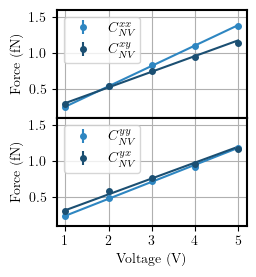

In [4]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
factor = 0.7
fig.set_size_inches(3.5*factor, 4*factor, forward=True)


ax1.plot(calib_df['voltage_xx'].values, calib_df['calib_curve_xx'].values/1e-15, color=colors[0], label=r'_$C_{NV}^{xx}$')
ax1.errorbar(calib_df['voltage_xx'].values, calib_df['mean_force_xx'].values/1e-15, yerr=calib_df['std_force_xx'].values, fmt='o', color=colors[0], label=r'$C_{NV}^{xx}$', markersize=4)
ax1.plot(calib_df['voltage_yx'].values, calib_df['calib_curve_yx'].values/1e-15, color=colors[2], label=r'_$C_{NV}^{xy}$')
ax1.errorbar(calib_df['voltage_yx'].values, calib_df['mean_force_yx'].values/1e-15, yerr=calib_df['std_force_yx'].values, fmt='o', color=colors[2], label=r'$C_{NV}^{xy}$', markersize=4)
#ax1.set_xlim([0, t.max()/1e-3])
#ax1.set_yticks([-0.75, 0, 0.75])
ax1.grid(True, which="both", ls="-")
ax1.set_yticks([0.5, 1.0, 1.5])
ax1.set_ylim([0.1, 1.6])
ax1.set_ylabel(r'Force (fN)')
ax1.legend()
#ax1.set_ylabel(r'$x$ (n$\textrm{m})$')
#ax1.set_ylim([-1, 1])


ax2.plot(calib_df['voltage_yy'].values, calib_df['calib_curve_yy'].values/1e-15, color=colors[0], label=r'_$C_{NV}^{yy}$')
ax2.errorbar(calib_df['voltage_yy'].values, calib_df['mean_force_yy'].values/1e-15, yerr=calib_df['std_force_yy'].values, fmt='o', color=colors[0], label=r'$C_{NV}^{yy}$', markersize=4)

ax2.plot(calib_df['voltage_xy'].values, calib_df['calib_curve_xy'].values/1e-15, color=colors[2], label=r'_$C_{NV}^{yx}$')
ax2.errorbar(calib_df['voltage_xy'].values, calib_df['mean_force_xy'].values/1e-15, yerr=calib_df['std_force_xy'].values, fmt='o', color=colors[2], label=r'$C_{NV}^{yx}$', markersize=4)


#ax2.set_ylabel(r'$y$ (n$ \textrm{m})$')
ax2.grid(True, which="both", ls="-")
#ax2.set_yticks([-0.75,0,0.75])
#ax2.set_ylim([-1, 1])
ax2.set_yticks([0.5, 1.0, 1.5])

ax2.set_xticks([1,2,3,4,5])
ax2.set_xlabel(r'Voltage (V)')
ax2.set_ylabel(r'Force (fN)')
ax2.set_ylim([0.1, 1.6])
ax2.legend()

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('../../plots/Chapter 5/electrodes_calib.pdf', dpi=300, bbox_inches = 'tight')
plt.show()

In [6]:
freq = np.load("../../data/1550/calib/freq_calib_eletrodo.npy", allow_pickle=True)
ref_power = np.load("../../data/1550/calib/ref_power_eletrodo.npy", allow_pickle=True)
drive_power = np.load("../../data/1550/calib/drive_power-eletrodo.npy", allow_pickle=True)

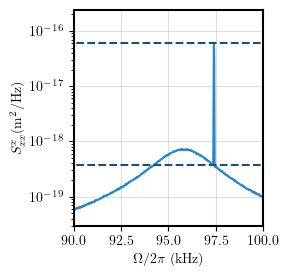

In [7]:
ax = plt.gca()
ax.figure.set_size_inches(3.5*factor, 4*factor, forward=True)
ax.grid(alpha = 0.4)
colors = ['#1B4F72', '#2E86C1', '#85C1E9']
ax.plot(freq/1000, unumpy.nominal_values(drive_power), color=colors[1])
ax.set_xlim([90, 100])
ax.set_ylim([3*10**-20, 4*max(unumpy.nominal_values(drive_power))])
ax.set_yscale('log')
ax.plot([0,200],[6e-17, 6e-17],linestyle='dashed', color=colors[0])
ax.plot([0,200],[3.7e-19, 3.7e-19],linestyle='dashed', color=colors[0])
ax.set_ylabel(r'$S_{xx}^x(\textrm{m}{}^2$/Hz)')
ax.set(xlabel=r'$\Omega/2\pi$ (kHz)')
##ax.legend(fontsize=8)
plt.savefig('../../plots/Chapter 5/sinc_calib.pdf', dpi=300, bbox_inches = 'tight')
plt.show()